In [308]:
import numpy as np
import dlop_ldn_function_bases as bases
import matplotlib.pyplot as plt
import nengo

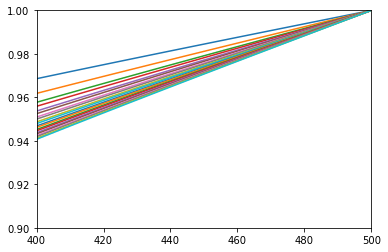

In [422]:
fig, ax = plt.subplots()

for q in range(1, 100, 5):
    N_wnd = 2000
    dt = 1e-3
    H = bases.mk_fourier_basis(q, N_wnd)
    H_pad = np.zeros((q, 10 * N_wnd))
    H_new = np.concatenate((H_pad, H, H_pad), axis=1)
    D = np.linalg.pinv(H)[0]

    Xs = np.zeros_like(H_new, dtype=complex)
    for i in range(q):
        Xs[i] = np.fft.fftshift(np.fft.fft(H_new[i]))
    response = np.abs(Xs.T @ D)
    response /= np.max(response)

    N0 = len(response) // 2
    cr = np.cumsum(response[N0:]) / np.sum(response[N0:])
    ax.plot(fs[N0:], cr)
    ax.set_xlim(400, 500)
    ax.set_ylim(0.9, 1.0)